# Welcome to the Intro to Astronomy Research Gaia Data Release 2 (DR2) Tutorial.

#### Originally written by Sarah Blunt, 2018. Updated by Aldo Panfichi, 2020

### In this tutorial, you will:
- learn about the Gaia DR2 Database and basic queries
- learn about the Astronomical Data Query Language (ADQL)
- use the Gaia DR2 Database to get Gaia parameters for the 10,000 closest stars
- plot a color-magnitude diagram

# 1. Tutorial

### What is Gaia?

Gaia is a mission led by the European Space Agency (ESA) to collect photometric, spectroscopic, and (primarily) astrometric data of Milky Way stars and some Solar System objects. The Gaia spacecraft (successor to the Hipparcos mission) was launched in 2013, and is expected to continue its mission until 2022. Gaia aims to put together by far the largest and most precise 3D space catalog to date, totalling approximately 1 billion astronomical objects - mainly stars, but also planets, comets, asteroids and quasars among others.

Gaia data is made publicly available through periodic data releases. We will be working with the most recent release, DR2.
Using the Gaia archive site, we can get data on the positions, brightnesses, distances, and more for millions of stars and make do various kinds of science and data visualization from them.

In [1]:
# First, let's get the imports out of the way.
from IPython.display import HTML
# numpy, for math
import numpy as np

# pandas, for data handling
import pandas as pd
pd.set_option('display.max_columns', None) # Display all of the columns of a DataFrame

# matplotlib, for plotting
import matplotlib.pyplot as plt

# "Magic command" to make the plots appear *inline* in the notebook
%matplotlib inline

### Where do we get the data from?

The Gaia archive can be found *HERE*: https://gea.esac.esa.int/archive/

Click on "Search" in the top left. You will see a form you can fill out to query the database. This is the "Basic" search, done through a GUI, where you can fill in conditions of your search using drop-down menus.

If you click on the "Advanced (ADQL)" tab at the top left, you will be able write your own, more complex query in an SQL-type language made for Gaia (the Astronomical Data Query Language). You'll probably have to do this for the assignment, but for now, let's learn how the basic query works.

### Basic Query

1. Make sure you're on the Basic query page
2. In the "Name" field type in "Messier 5". It should resolve the name. This will center our search on M5, a globular cluster in the constellation Serpens.
3. To the right, put a "3" and then change the unit from "arc sec" to "arc min". This will tell the archive to search in a radius of 3 arcminutes around M5. There are 60 arcseconds in an arcminute, anda 60 arcminutes in a degree.
4. At the bottom, change "Max. number of results" to 500. We're looking for the first 500 results.
5. Click "Submit Query"
6. You'll see a table pop up with the first 20 results from the query. At the bottom, change "VOTable" to "csv" and click "Download results". This will download a csv to your computer with the queried data in it.

With this query, we are asking the Gaia server to get us the first 500 stars that are in a 3 arcsecond radius circle around the globular cluster M5.

*You can always click on "Show query in ADQL form" below, to see what your basic query would look like in ADQL syntax!*

In [2]:
#Now we can read the csv file into a pandas database

m5 = pd.read_csv('data/m5.csv')
m5

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val
0,4421572868783602304,229.608260,0.451151,2.080235,0.755487,NaN,NaN,18.320505,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
1,4421573315458434816,229.661337,20.658777,2.095936,35.101277,NaN,NaN,18.712660,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
2,4421573212376895104,229.626614,2.232215,2.102885,3.039926,NaN,NaN,18.354128,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
3,4421572971862343296,229.623267,2.472374,2.089429,1.216912,NaN,NaN,18.066124,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
4,4421572044148629760,229.641719,10.074508,2.056986,2.576733,NaN,NaN,18.675959,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4421573659053861760,229.624860,1.728649,2.125516,0.729241,NaN,NaN,19.538334,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
496,4421572765702679936,229.613214,20.141048,2.066509,34.143973,NaN,NaN,18.893099,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
497,4421571734910183808,229.642104,10.205198,2.034558,3.335645,NaN,NaN,20.514206,0.429529,NaN,NaN,NOT_AVAILABLE,NaN,NaN
498,4421572078507474048,229.658871,4.743102,2.058121,1.306261,NaN,NaN,19.973127,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN


## Column Explanations

mas = milli arc second

ra : Right ascension (double, Angle[deg])
    Barycentric right ascension $\alpha$ of the source in ICRS at the reference epoch ref_epoch

ra_error : Standard error of right ascension (double, Angle[mas]) 
    Standard error $\sigma \alpha ≡ \sigma \alpha \cos \delta$  of the right ascension of the source in ICRS at the reference epoch ref_epoch.

dec : Declination (double, Angle[deg])
    Barycentric declination $\delta$ of the source in ICRS at the reference epoch ref_epoch

dec_error : Standard error of declination (double, Angle[mas])
    Standard error $\sigma \delta$ of the declination of the source in ICRS at the reference epoch ref_epoch 
    
    
### Complete data dictionary at: https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html

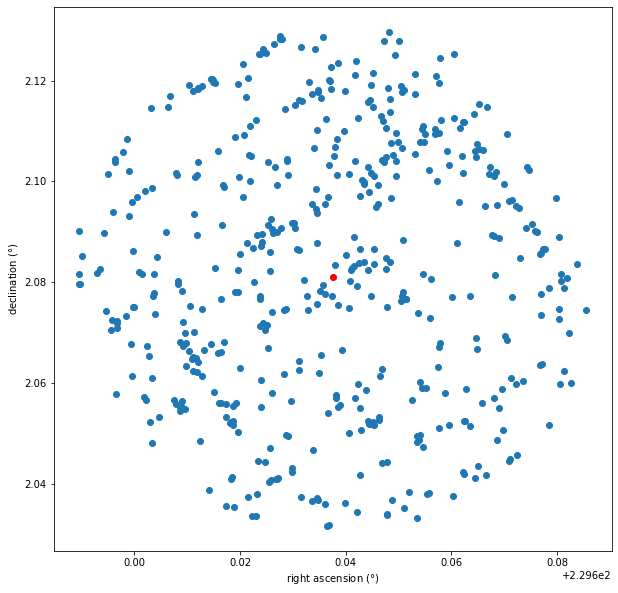

In [3]:
#Here are the results of our query plotted into ra/dec space

fig = plt.figure(figsize = [10,10])
plt.scatter(m5['ra'], m5['dec'])
plt.plot(229.6375, 2.0811, 'ro') # I've plotted the coordinates of M5 in red

plt.xlabel('right ascension ($\degree$)')
plt.ylabel('declination ($\degree$)')
plt.show()

Confused about RA/Dec? Check out: https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/

### From mentioned link

Every object in the sky has two numbers that fix its location called right ascension and declination, more generally referred to as the object's celestial coordinates. Declination corresponds to latitude and right ascension to longitude

Viewed from Earth's equator, the celestial equator begins at the eastern horizon, passes directly overhead and drops down to the western horizon. Since we're inside a sphere, it would continue around the backside of the Earth as well.

From mid-latitudes, the celestial equator stands midway between the horizon and overhead point, while from the poles the celestial equator encircles the horizon. Anything north of the celestial equator has a northerly declination, marked with a positive sign. Anything south of the equator has a negative declination written with a negative sign. For instance, Vega's declination is +38° 47′ 1″, while Alpha Centauri's is –60° 50′ 2″. One star is north of the celestial equator and the other south.

<img src="RA and Dec.jpg" title="Right Ascension and Declination" alt="Here's Earth inside the big soccer ball. Declination (green) is measured in degrees north and south of the celestial equator. Right ascension, akin to longitude, is measured east from the equinox. The red circle is the Sun's apparent path around the sky, which defines the ecliptic. Tom Ruen CC BY-SA 3.0" width=400/>

 Astronomers use the spot the Sun arrives at on the first day of spring, called the vernal equinox. Presently, it's located in the constellation of Pisces, the Fish. The sky can be treated as a clock, since it wheels by as Earth rotates, so the zero point of right ascension is called "0h" for "zero hours." Unlike longitude, right ascension is measured in just one direction — east. Because there are 24 hours in a day, each hour of right ascension measured along the equator equals 1/24th of a circle (360° divided by 24) or 15°. That's a little more than one-half the width of the W-shaped constellation Cassiopeia.

In keeping with right ascension's time theme, hours are subdivided into minutes and seconds, and are even written out as minutes (m) and seconds (s). Let take the North Star for example. Polaris is located at RA 2h 41m 39s, Dec. +89° 15′ 51″. Because the stars circle about the sky every 24 hours, right ascension or RA ranges from 0h to 24h. The star 29 Piscium, located immediately east of the equinox point is very close to 0h with an RA of 0h 01m 49s, while its neighbor, Omega (ω) Piscium, located just west of the equinox point, has an RA of 23h 59m 19s.

The celestial coordinates also change (an effect called [precession](https://www-istp.gsfc.nasa.gov/stargaze/Sprecess.htm) which is a by-effect of wobble in Earth's axis (The cause of the precession is the equatorial bulge of the Earth, caused by the centrifugal force of the Earth's rotation which changes the Earth from a perfect sphere to a slightly flattened one, thicker across the equator. The attraction of the Moon and Sun on the bulge is then the "nudge" which makes the Earth precess). 

Recession causes the equinox points to drift westward at a rate of 50.3 arcseconds annually. As the equinox shifts, it drags the coordinate grid with it. That's why star catalogs and software programs have to be updated regularly to the latest "epoch." This is done every 50 years. Most catalogs and software currently use Epoch J2000.0 coordinates (for the year 2000). The next major update will happen in 2050.

### A slightly more advanced query

1. Make sure you're on the Basic query page
2. In the "Name" field type in "Messier 92". It should resolve the name. This will center our search on M92, a globular cluster in the northern constellation of Hercules.
3. To the right, put a "1" and then change the unit from "arc sec" to "degree". This will tell the archive to search in a radius of 1 degree around M92.
4. Under "Extra Conditions" you can add conditions to filter your data by. For example, say we wanted to look for close stars (say, with parallaxes greater than 5) with well-resolved parallax measurements (so the error in parallax is no larger than, say, 1/20th of the parallax value). In this example, we could do this by adding a condition that says "parallax" >= 5, and another condition to say "parallax_over_error" >= 20.
5. Under "Display Columns" you can pick and choose what data you wish to query the archive for. For example, say we want to take data on proper motions, but are not very interested in photometric data. In this example, under "Display Columns" we could add a checkmark to pmra and pmdec (proper motion), and uncheck other columns we don't need.
6. Play around with the conditions and columns you want!
7. Click "Submit Query"
8. You'll see a table pop up with the first 20 results from the query. At the bottom, change "VOTable" to "csv" and click "Download results". This will download a csv to your computer with the queried data in it.


In the above example, we would be asking the Gaia server to get us the stars that are in a 1 degree radius circle in the sky, centered around the globular cluster M92, that have a parallax greater than or equal to 5 and the parallax divded by its error greater than 20 (say we want very precise measurements of distance, which is just 1/parallax). We can also say we only care to make astrometric measurements right now, so we don't care about any photometric datapoints such as colors or magnitudes.

*You can always click on "Show query in ADQL form" below, to see what your basic query would look like in ADQL syntax!*

Play around with your data and matplotlib. What interesting things can you find?

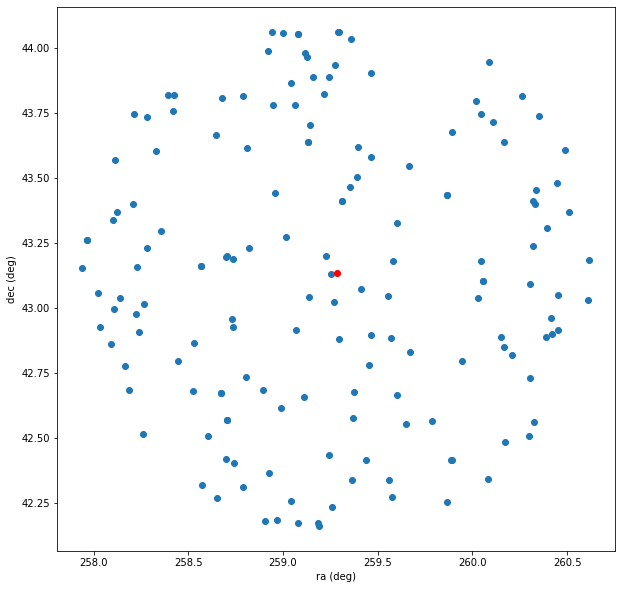

In [4]:
#For example, let's repeat the above plot
m92 = pd.read_csv('data/m92.csv') # I renamed my csv file to 'm92.csv'

fig = plt.figure(figsize = [10,10])
plt.scatter(m92['ra'], m92['dec'])
plt.plot(259.2833, 43.1358, 'ro') # I've plotted the coordinates of M92 in red

plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.show()

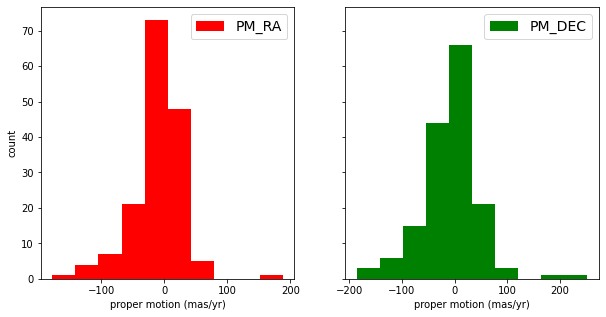

In [5]:
#Another example, let's take a quick & dirty look at the distribution of proper motions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.hist(m92['pmra'], label="PM_RA", color="r")
ax2.hist(m92['pmdec'], label="PM_DEC", color="g")

ax1.set_ylabel('count')
ax1.set_xlabel('proper motion (mas/yr)')#milliarc second per year
ax2.set_xlabel('proper motion (mas/yr)')

ax1.legend(loc="best", fontsize=14, numpoints=1)
ax2.legend(loc="best", fontsize=14, numpoints=1)
plt.show()

Text(0, 0.5, 'PM_DEC (mas/yr)')

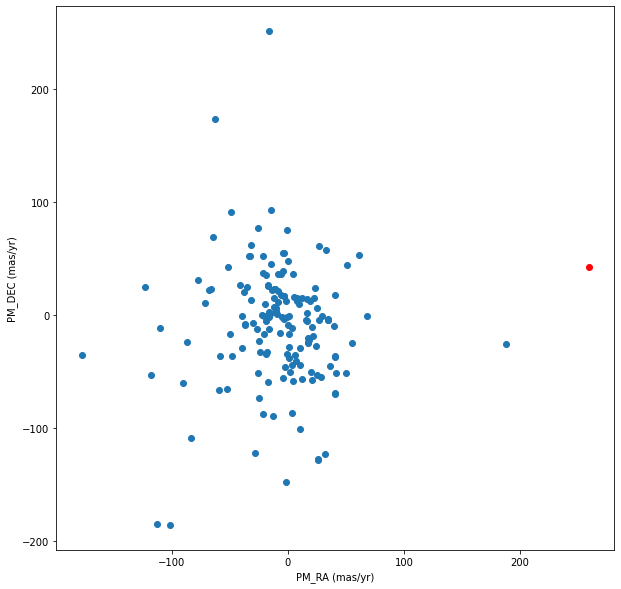

In [6]:
#A proper motion plot
fig = plt.figure(figsize = [10,10])
plt.scatter(m92['pmra'], m92['pmdec'])
plt.plot(259.2833, 43.1358, 'ro') # I've plotted the coordinates of M92 in red

plt.xlabel('PM_RA (mas/yr)')
plt.ylabel('PM_DEC (mas/yr)')

### Querying with ADQL:
ADQL is a data query language similar to SQL, built for astronomical data purposes in mind. Its syntax is similar enough to SQL if you are familiar with it, though with some differences. We're going to look at a very simple ADQL query in this tutorial.
#### To learn more about ADQL syntax, see the links under Assignment, below

What do we want from this query? Let's select the 100 stars closest to Earth (so, with the largest parallaxes). The syntax for this query goes as follows:

We select the top 100 results:

...and the following columns:

...from the DR2 Source catalog:

...where the parallax is greater than 0 (to avoid issues with improperly catalogued parallaxes):

...and the results are in descending order, by parallax:

Putting the whole query together:

In [7]:
#Let's take a look at what this data looks like!
closest = pd.read_csv('data/closest100-result.csv')
closest

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error
0,4062964299525805952,272.237829,1.276152,-27.645916,0.830618,1851.882140,1.285094
1,4065202424204492928,274.906872,1.251748,-25.255882,1.571499,1847.433349,1.874937
2,4051942623265668864,276.223193,0.682959,-27.140479,0.500750,1686.265958,1.473535
3,4048978992784308992,273.112421,1.092637,-31.184670,1.362824,1634.283354,1.971231
4,4059168373166457472,259.297177,1.640748,-30.486547,2.069445,1513.989051,2.868580
...,...,...,...,...,...,...,...
95,4049284794374737536,272.676884,1.471668,-30.365627,1.304796,635.891449,1.723768
96,4038950244078680832,271.127604,1.478231,-35.445585,1.384748,632.099183,1.699712
97,4048896666737862656,273.411919,1.164029,-31.807867,0.961718,628.383496,1.281465
98,4048767474113708160,272.760347,0.980236,-32.282528,1.203943,627.809905,2.083120


# 2. Assignment

### Notes:
- Working with ADQL can be challenging, especially if you don't have experience with SQL or related query languages. If you spend too much time stuck on a task, post about it on Piazza (you can post anonymously if you want). An instructor will help you out! Don't struggle needlessly.
- Make sure you complete the pandas and matplotlib tutorials before attempting this assignment.

### Learn More About ADQL

- Navigate to the Gaia ADQL interface. First, go [here](https://gea.esac.esa.int/archive/). Click "Search," then click "Advanced (ADQL)" (in the top left corner of the page). 

- Read [this webpage](https://gea.esac.esa.int/archive-help/adql/index.html). 

- Read slides 6-17 in [this powerpoint](https://www.cosmos.esa.int/documents/915837/915858/ADQL_handson_slides.pdf/652b9120-a3fe-4857-b5eb-933b476687ad).

   Try out some of the commands for yourself in the Gaia ADQL search bar you opened in step 1. Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

   Don't worry if you don't understand everything in the powerpoint! Pick out the 7 most important slides and summarize them for yourself. 
   
   ** Note: wherever the powerpoint uses "gaiadr1.tgas_source," replace with "gaiadr2.gaia_source."

# Use the Gaia DR2 Database to Get Gaia Parameters for the 10,000 Closest Stars

### Write an ADQL query to get parameters of the 10,000 closest stars. Your query should return the following parameters:

- BP - RP color (bp_rp in the Gaia database)

_The photometry of a celestial source is generally performed by recording the incoming light on a detector after it has passed through an optical filter that selects a range of wavelengths. The BP and RP are Blue Photometers and Red Photometers, which tells the intensity of blue light and red light captured using photometry, and hence the bluer or the redder the star is. 0 -> bluer star and 3-> redder star_
- absolute g-band photometric magnitude (you'll need to calculate this one)
- distance

### Download your Query Results as a csv file. 

### Hints:
- Distance (in parsecs) is the inverse of parallax (in arcseconds). Keep an eye on units! Gaia by default shows parallaxes in milliarcseconds (mas) .
- You can calculate absolute photometric magnitude in the gband using this formula: phot_g_mean_mag + 5 + 5 * log10(parallax/1000)
- You'll need to use "ORDER BY" in your ADQL command.
- Some Gaia sources have negative parallaxes due to instrumental imperfections. You'll need to add a line to your query specifying that parallax must be greater than 0. 

_The  processing  of  the  photometric  data  in  DR2  has  nottreated  blends  in  the  windows  of  the  blue  and  red  photome-ters  (BP  and  RP).  As  a  consequence,  the  measured  BP  andRP  fluxes  may  include  the  contribution  of  flux  from  nearbysources,  the  highest  impact  being  in  sky  areas  of  high  stel-lar  density,  such  as  the  inner  regions  of  globular  clusters,  theMagellanic  Clouds,  or  the  Galactic  Bulge.  During  the  valida-tion  process,  misdeterminations  of  the  local  background  havealso  been  identified.  In  some  cases,  this  background  is  dueto  nearby  bright  sources  with  long  wings  of  the  point  spreadfunction that have not been properly subtracted. In other cases,the background has a solar type spectrum, which indicates thatthe modelling of the background flux is not good enough. Thefaint sources are most strongly affected_
- Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

# Plot a Color-Magnitude Diagram of the 10,000 Closest Stars

### 1. Using [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), read your downloaded csv file into a pandas DataFrame

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

# Type your pd.read_csv command here: 
stellar=pd.read_csv('data/closest_10k-result.csv')
# HINTS: 
# - make sure the jupyter notebook and your csv file are in the same directory
# - your read_csv command should be 1 line of code

Populating the interactive namespace from numpy and matplotlib


### 2. Using matplotlib.pyplot, make a scatterplot of BP-RP color vs absolute g-band magnitude. This is a [color-magnitude diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram)! 

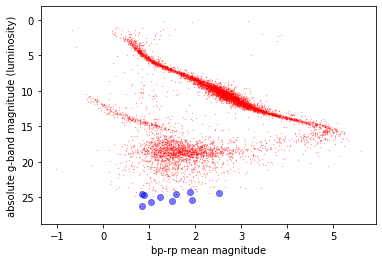

In [58]:
plt.figure()

# Type your plotting code here:
plt.scatter(stellar.bp_rp, stellar.abs_gmag, alpha=0.5, s=0.1, color='r')

# More Fun Things to Try if You're Interested:
# - use plt.ylim to reverse the direction of the y axis.
plt.ylim(max(stellar.abs_gmag)+2,min(stellar.abs_gmag)-2)
# - give your plot x and y labels.
plt.xlabel('bp-rp mean magnitude')
plt.ylabel('absolute g-band magnitude (luminosity)')
# - make the points red
#(Done above)
# - make the 10 closest stars red
stellar_trim=stellar[stellar.s_dist.notnull() & stellar.bp_rp.notnull() & stellar.abs_gmag.notnull()]
stellar_top10=stellar_trim.head(10)
plt.plot(stellar_top10.bp_rp, stellar_top10.abs_gmag, 'o', alpha=0.5, color='b')
plt.savefig('bp_rp vs abs_gmag.png', dpi=300)

BONUS: compare your results against Figure 1 in this [paper]{https://arxiv.org/pdf/1804.09378.pdf} 
- What similarities and differences do you notice? 

- __A: The intensity in the diagram matches the intensity of our graph (More stars in the same range) when we look at a cut out portion of our graph (Y is limited to ~15__

- Challenge: read section 2.1 of this paper and try to reproduce their plot exactly.

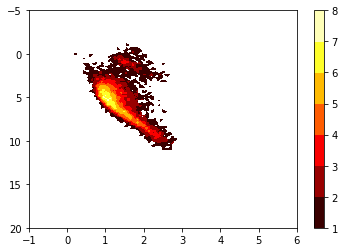

In [126]:
challenge=pd.read_csv('data/challenge-result.csv')
#Took help from https://github.com/rwk506/HessDiagram/blob/master/HessCMD.py

### Use color and magnitude data to split and average into a binned 2D histogram
heatmap, xedges, yedges = np.histogram2d(challenge.bp_rp,challenge.mg,bins=100)

### Find the cell centers from the cell edges
x = 0.5*(xedges[:-1] + xedges[1:])
y = 0.5*(yedges[:-1] + yedges[1:])
## Promote to 2D arrays
Y, X = np.meshgrid(y, x)

### Masked out values without data
heatmap = np.ma.array(heatmap, mask=(heatmap==0))
#From Paper: The colour scale rep-resents the square root of the relative density of stars.
heatmap = np.sqrt(heatmap)
cntr=plt.contourf(X,Y,heatmap,cmap=cm.hot)
cntr.cmap.set_under('white')

# ### Set plot limits as default or user-defined option
xlim(-1,6)
ylim(20,-5)
plt.colorbar()

savefig('heatmap.png',dpi=300)
